In [1]:
import pandas as pd
import json

In [ ]:
inscriptions = pd.read_csv('../datos/2024-10/transactions.csv', parse_dates=['previous_time', 'current_time'], date_format='%Y-%m-%d %H.%M.%S')
# Restar 5 horas para que sea UTC-5
inscriptions['previous_time'] = inscriptions['previous_time'] - pd.Timedelta(hours=5)
inscriptions['current_time'] = inscriptions['current_time'] - pd.Timedelta(hours=5)
inscriptions

,previous_time,current_time,nrc,delta_enrolled
0,2024-01-09 09:20:00,2024-01-09 09:21:15,40034,1
1,2024-01-09 09:20:00,2024-01-09 09:21:15,66980,-1
2,2024-01-09 09:20:00,2024-01-09 09:21:15,13746,1
3,2024-01-09 09:20:00,2024-01-09 09:21:15,55026,-1
4,2024-01-09 09:20:00,2024-01-09 09:21:15,65784,1
...,...,...,...,...
83257,2024-01-21 23:56:06,2024-01-21 23:57:20,51726,1
83258,2024-01-22 00:11:06,2024-01-22 00:12:22,69266,-1
83259,2024-01-22 00:25:04,2024-01-22 00:26:19,64036,-1
83260,2024-01-22 00:25:04,2024-01-22 00:26:19,68994,-1


In [ ]:
courses = pd.read_json('../datasets/2024-10/initial_state.json')
courses

,llave,nrc,class,course,section,credits,title,maxenrol,enrolled,term,ptrm,ptrmdesc,seatsavail,campus,projenrl,schedules,instructors,attr
0,39342202410,39342,ADMI,1101,1,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (PARA...,70,68,202410,1,PERIODO COMPLETO,2,CAMPUS PRINCIPAL,90,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...","[{'name': 'DURAN AMOROCHO XAVIER HERNANDO', 'i...",[]
1,42986202410,42986,ADMI,1101,2,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (PARA...,70,64,202410,1,PERIODO COMPLETO,6,CAMPUS PRINCIPAL,90,"[{'time_ini': '0930', 'time_fin': '1050', 'cla...","[{'name': 'DURAN AMOROCHO XAVIER HERNANDO', 'i...",[]
2,25454202410,25454,ADMI,1102,1,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (NO A...,32,1,202410,1,PERIODO COMPLETO,31,CAMPUS PRINCIPAL,40,"[{'time_ini': '0630', 'time_fin': '0750', 'cla...","[{'name': 'DIAZ RAMIREZ JULIA HELENA', 'ind': ...",[{'code': 'EPSI'}]
3,11411202410,11411,ADMI,1102,2,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (NO A...,32,9,202410,1,PERIODO COMPLETO,23,CAMPUS PRINCIPAL,40,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...","[{'name': 'DIAZ RAMIREZ JULIA HELENA', 'ind': ...",[{'code': 'EPSI'}]
4,25458202410,25458,ADMI,1102,3,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (NO A...,32,0,202410,1,PERIODO COMPLETO,32,CAMPUS PRINCIPAL,40,"[{'time_ini': '0630', 'time_fin': '0750', 'cla...","[{'name': 'CASTILLO GUTIERREZ JUAN PABLO', 'in...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,69447202410,69447,SPUB,4543,1,2,DETERMINANTES SOCIALES DE LA SALUD (Ciclo 2 de...,30,8,202410,8B,SEGUNDO CICLO - 8 SEMANAS,22,VIRTUAL,0,"[{'time_ini': '1000', 'time_fin': '1220', 'cla...","[{'name': 'LUCUMI CUESTA DIEGO IVAN', 'ind': '...",[{'code': 'VIRT'}]
6427,66159202410,66159,SPUB,4545,1,2,FUNDAMENTOS DEL DERECHO A LA SALUD,30,6,202410,1,PERIODO COMPLETO,24,CAMPUS PRINCIPAL,0,"[{'time_ini': '1700', 'time_fin': '1950', 'cla...","[{'name': 'OCAMPO CAÑAS JOVANA ALEXANDRA', 'in...",[{'code': 'SEMP'}]
6428,22764202410,22764,STRA,5401,1,2,PROYECTO DE GRADO,20,8,202410,2,PERIODO NO RETIRABLE,12,CAMPUS PRINCIPAL,10,"[{'time_ini': None, 'time_fin': None, 'classro...","[{'name': 'RIOS MESIAS MARIO ALBERTO', 'ind': ...",[]
6429,70161202410,70161,TEST,1001,1,3,CURSO BANNER,85,0,202410,3,CURSOS MEDICINA - 21 SEMANAS,85,CAMPUS PRINCIPAL,0,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...",[],[]


In [38]:
inscriptions['delta_enrolled'].abs().sum()

114664

In [39]:
inscriptions.groupby('nrc').agg({'delta_enrolled': 'sum'}).sort_values('delta_enrolled', ascending=False).merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc').head(50)

,delta_enrolled,class,course,title,nrc
1591,178,DERE,1901,EXAMEN DE CICLO 1,10035
3919,177,INTL,2201,INTERCAMBIO ACADEMICO DE PREGRADO,31315
1773,147,DERE,3905,EXAMEN DE FACULTAD,10597
1758,136,DERE,3801,CONSULTORIO JURIDICO I,10909
860,118,CBCO,1032,LA NACIÓN DESDE LOS MEDIOS (Ciclo 1 de 8 semanas),68743
861,114,CBCO,1032,LA NACIÓN DESDE LOS MEDIOS (Ciclo 2 de 8 semanas),63229
1000,107,CBPC,1331,HISTORIA DE LA VERDAD: TEOLOGÍA Y CIENCIA MODERNA,48220
737,97,CBCA,1031,ARTE Y CINE: VER ES UN APRENDIZAJE (Ciclo 1 de...,44956
3813,97,IIND,3400,FINANZAS,10752
153,96,ADMI,3200,OPCIÓN DE GRADO,66728


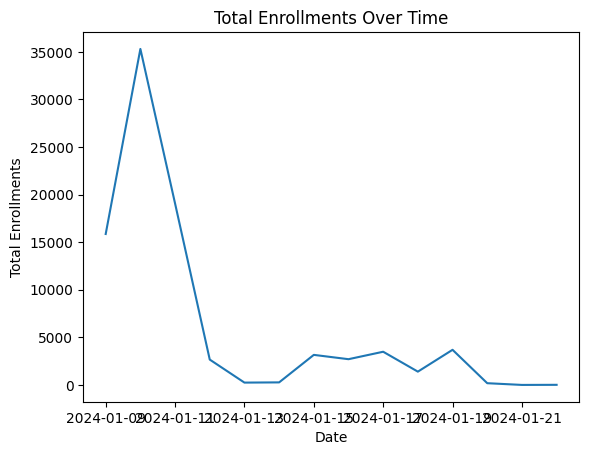

In [40]:
import matplotlib.pyplot as plt

# Group the data by date and calculate the sum of delta_enrolled
enrollments_over_time = inscriptions.groupby(inscriptions['current_time'].dt.date)['delta_enrolled'].sum()

# Create the line plot
enrollments_over_time.plot(kind='line')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Total Enrollments')
plt.title('Total Enrollments Over Time')

# Display the plot
plt.show()


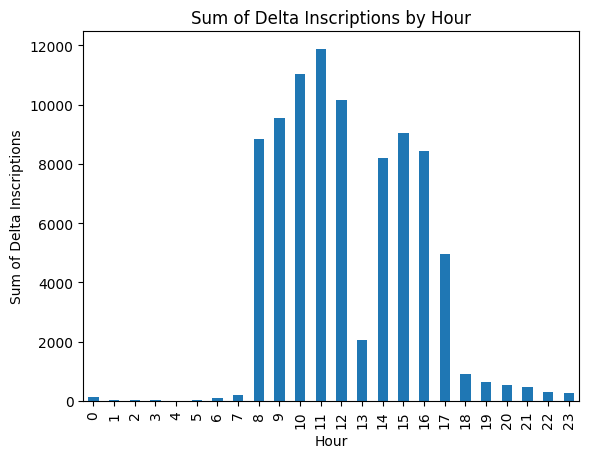

In [41]:
# Extract the hour from the current_time column
inscriptions['hour'] = inscriptions['current_time'].dt.hour

# Sum the delta_enrolled at each hour
hourly_sum = inscriptions.groupby('hour')['delta_enrolled'].sum()

# Create the bar plot
hourly_sum.plot(kind='bar')

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Sum of Delta Inscriptions')
plt.title('Sum of Delta Inscriptions by Hour')

# Display the plot
plt.show()


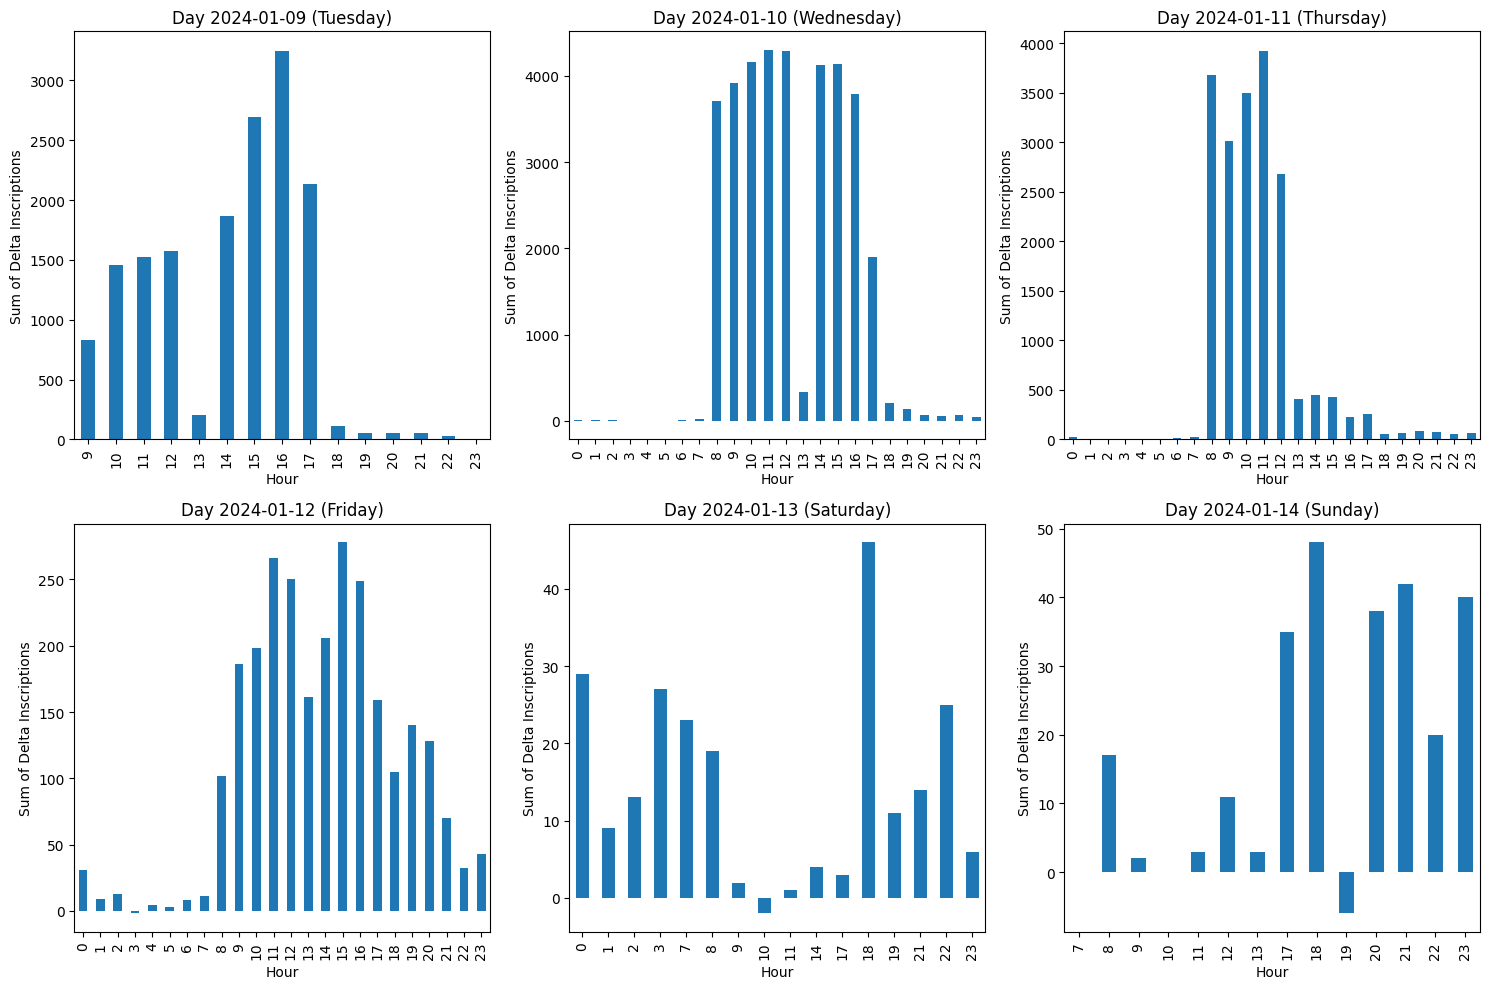

In [47]:
# Create a subplot with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the subplots and plot the data
for i, ax in enumerate(axs.flatten()):
    # Filter the data for the current day
    day_data = inscriptions[inscriptions['current_time'].dt.date == (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date()]
    
    # Group the data by hour and calculate the sum of delta_enrolled
    hourly_sum = day_data.groupby('hour')['delta_enrolled'].sum()
    
    # Create the bar plot
    hourly_sum.plot(kind='bar', ax=ax)

    day_str = (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date().strftime('%Y-%m-%d')
    day_of_the_week = (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date().strftime('%A')
    
    # Set the labels and title for each subplot
    ax.set_xlabel('Hour')
    ax.set_ylabel('Sum of Delta Inscriptions')
    ax.set_title(f'Day {day_str} ({day_of_the_week})')
    
# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


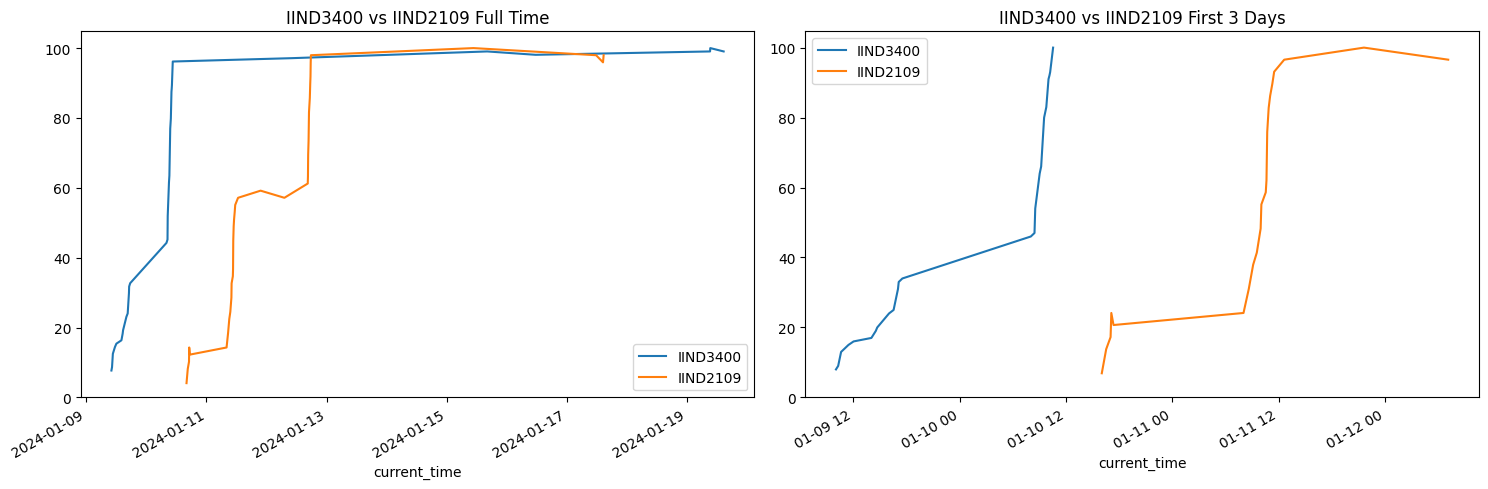

In [113]:
def plot_course_inscriptions(course_code, date_range=None):
    # Extract the class and course from the course_code
    course_class, course_course = course_code[:4], course_code[4:]
    
    # Filter the data for the course
    course_data = courses[(courses['class'] == course_class) & (courses['course'] == course_course)]
    course_nrc = course_data.nrc.values[0]

    # Filter the inscriptions data for the course
    course_inscriptions = inscriptions[inscriptions['nrc'] == course_nrc].copy()
    
    if date_range:
        # Filter the data if in date_range
        start_time, end_time = date_range[0], date_range[1]
        course_inscriptions = course_inscriptions[(course_inscriptions['current_time'] >= start_time) & (course_inscriptions['current_time'] <= end_time)]
    
    course_inscriptions['cumulative_enrolled'] = course_inscriptions['delta_enrolled'].cumsum() + course_data['enrolled'].values[0]

    # Normalize as percentage
    course_inscriptions['cumulative_enrolled'] = course_inscriptions['cumulative_enrolled'] / course_inscriptions['cumulative_enrolled'].max() * 100

    course_inscriptions.plot(x='current_time', y='cumulative_enrolled', kind='line', ax=plt.gca(), label=course_code)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

course_code_1 = 'IIND3400'
course_code_2 = 'IIND2109'

# Call plot_course_inscriptions for full time 
plt.sca(axs[0])
axs[0].set_title(f'{course_code_1} vs {course_code_2} Full Time')
plot_course_inscriptions('IIND3400')
plot_course_inscriptions('IIND2109')
axs[0].set_ylim(bottom=0) 

# Call plot_course_inscriptions for first 3 days 
plt.sca(axs[1])
axs[1].set_title(f'{course_code_1} vs {course_code_2} First 3 Days')
date_range = (inscriptions['current_time'].min(), inscriptions['current_time'].min() + pd.DateOffset(days=3))
plot_course_inscriptions('IIND3400', date_range=date_range)
plot_course_inscriptions('IIND2109', date_range=date_range)
axs[1].set_ylim(bottom=0)

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

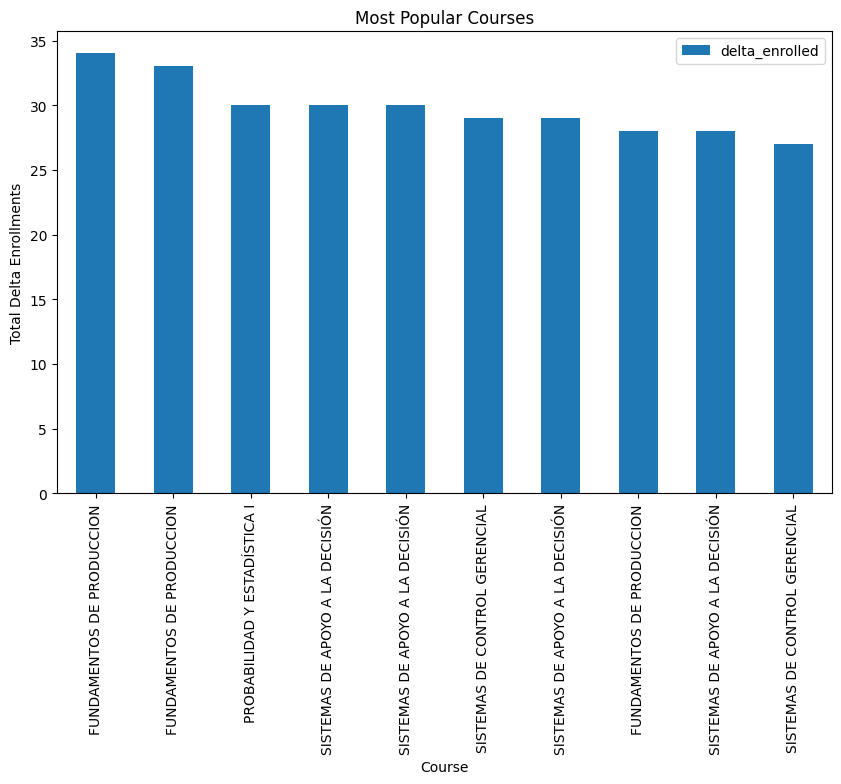

In [101]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a slider for selecting the datetime range
start_date = inscriptions['current_time'].min()
end_date = start_date + pd.DateOffset(days=3)

options = pd.date_range(start=start_date, end=end_date, freq='H')
initial_selection = (0, len(options) - 1)

date_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=initial_selection,
    description='Datetime Range:',
    layout=widgets.Layout(width='75%'),
    readout=False,
)

# Define the display to substitute the readout
date_range_display = widgets.HTML(
    value=(
        f"<b>{options[initial_selection[0]]}" + 
        f" - {options[initial_selection[1]]}</b>"))

# Define the date range using the widgets.HBox
date_range = widgets.HBox(
    (date_range_slider, date_range_display))


#################
courses_class = 'IIND'

# Create a function to update the plot based on the selected datetime range
def update_plot(datetime_range):
    start_datetime = datetime_range[0]
    end_datetime = datetime_range[1]
    
    # Filter the inscriptions data for the selected datetime range
    filtered_inscriptions = inscriptions[(inscriptions['current_time'] >= start_datetime) & (inscriptions['current_time'] <= end_datetime)]
    
    # Group the data by course and calculate the sum of delta_enrolled
    popular_courses = filtered_inscriptions.groupby('nrc').agg({'delta_enrolled': 'sum'}).sort_values('delta_enrolled', ascending=False).merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')

    # Filter the popular courses for the selected class
    popular_courses = popular_courses[popular_courses['class'] == courses_class].head(10)
    
    # Clear the current plot
    clear_output(wait=True)

    # Display the slider
    display(date_range)

    date_range_display.value = f"<b>{start_datetime} - {end_datetime}</b>"

    if len(popular_courses) == 0:
        print('No popular courses found for the selected datetime range.')
        return
    
    # Create the bar plot
    popular_courses.plot(x='title', y='delta_enrolled', kind='bar', figsize=(10, 6))
    
    # Set the labels and title
    plt.xlabel('Course')
    plt.ylabel('Total Delta Enrollments')
    plt.title('Most Popular Courses')
    
    # Display the plot
    plt.show()


# Call the update_plot function with the initial datetime range
update_plot(date_range_slider.value)

# Create an observer to update the plot when the slider value changes
date_range_slider.observe(lambda change: update_plot(change.new), 'value')


In [120]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for entering the NRC
nrc_input = widgets.Text(
    value='',
    placeholder='Enter NRC',
    description='NRC:',
    layout=widgets.Layout(width='200px')
)

# Create a button widget for triggering the plot
plot_button = widgets.Button(description='Plot')

# Define a function to handle the button click event
def plot_button_clicked(b):
    nrc = nrc_input.value
    
    # Filter the data for the given NRC
    filtered_data = inscriptions[inscriptions['nrc'] == int(nrc)]
    
    # Calculate the cumulative sum of delta_enrolled
    filtered_data['cumulative_enrolled'] = filtered_data['delta_enrolled'].cumsum()
    
    # Get the maxenrol for the given NRC from the courses dataframe
    maxenrol = courses[courses['nrc'] == int(nrc)]['maxenrol'].values[0]
    
    # Create the interactive line plot using Plotly Express
    fig = px.line(filtered_data, x='current_time', y='cumulative_enrolled', title=f'Cumulative Enrolled for NRC: {nrc}')
    
    # Add a horizontal line for the maxenrol
    fig.add_hline(y=maxenrol, line_dash='dash', line_color='red', annotation_text=f'Max Enroll: {maxenrol}', annotation_position='bottom right')
    
    fig.show()

# Attach the button click event handler
plot_button.on_click(plot_button_clicked)

# Display the widgets
display(nrc_input, plot_button)


Text(value='', description='NRC:', layout=Layout(width='200px'), placeholder='Enter NRC')

Button(description='Plot', style=ButtonStyle())

/var/folders/9y/__pdhdy15bs2zh7r1m4dhnm40000gp/T/ipykernel_74277/9121345.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/9y/__pdhdy15bs2zh7r1m4dhnm40000gp/T/ipykernel_74277/9121345.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/9y/__pdhdy15bs2zh7r1m4dhnm40000gp/T/ipykernel_74277/9121345.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Number of Courses by Days of the Week'}, xlabel='days_of_the_week'>

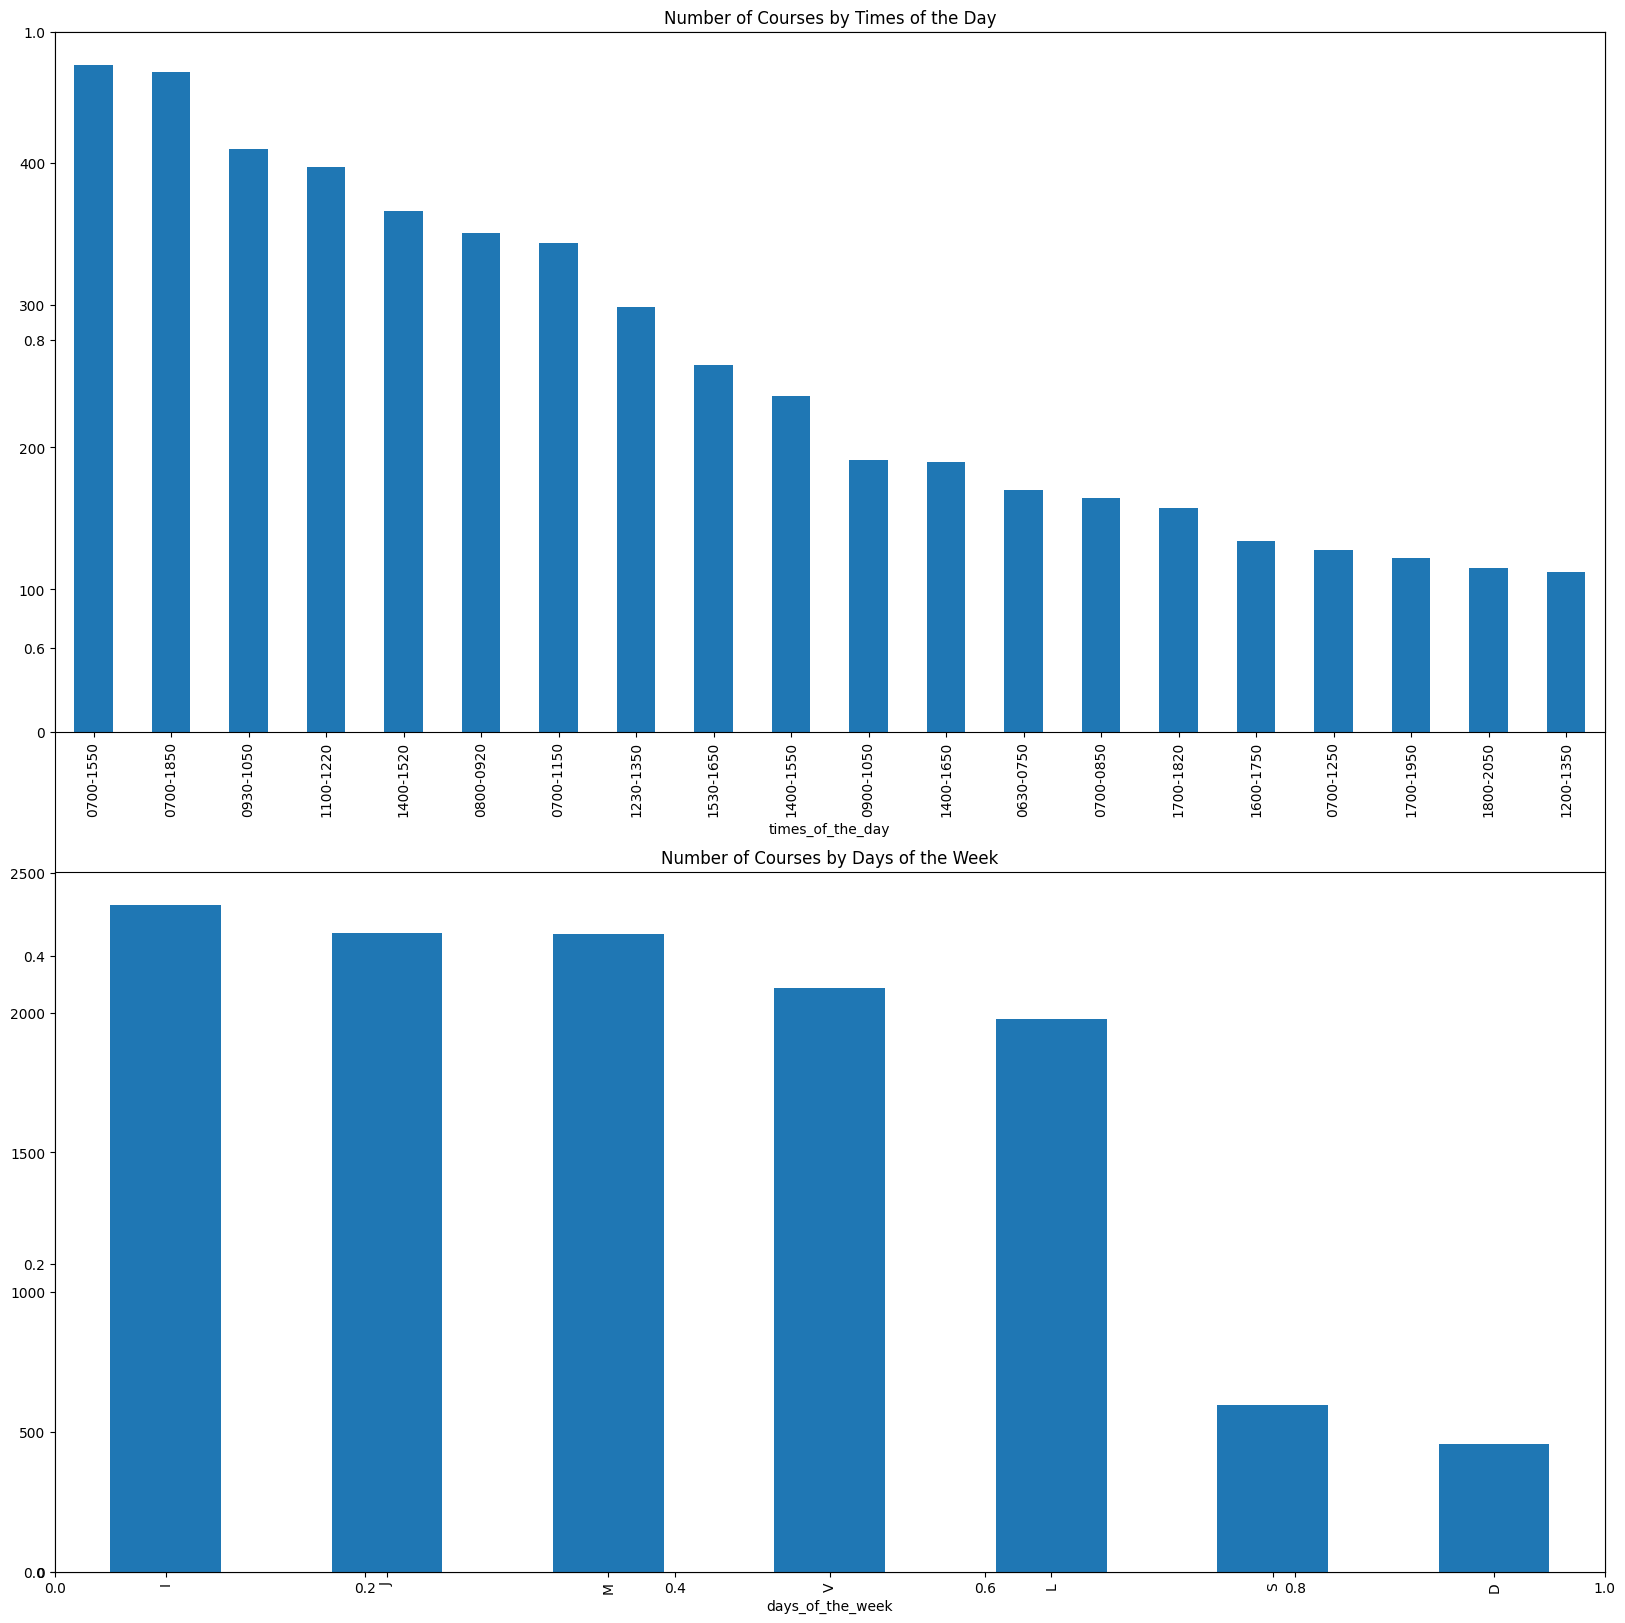

In [139]:
courses['times_of_the_day'] = courses['schedules'].apply(lambda schedule: set(f"{data['time_ini']}-{data['time_fin']}" for data in schedule if data['time_ini'] and data['time_fin']))
courses['days_of_the_week'] = courses['schedules'].apply(lambda schedule: set(data[day] for data in schedule for day in ['l','m','i','j','v','s','d'] if data[day]))

plt.subplots(figsize=(20, 20))

# Plot the number of courses by times_of_the_day
plt.subplot(2, 1, 1)
times_of_the_day_counts = courses['times_of_the_day'].explode().value_counts()[:20]
times_of_the_day_counts.plot(kind='bar', title='Number of Courses by Times of the Day')

# Plot the number of courses by days_of_the_week
plt.subplot(2, 1, 2)
days_of_the_week_counts = courses['days_of_the_week'].explode().value_counts()
days_of_the_week_counts.plot(kind='bar', title='Number of Courses by Days of the Week')

In [170]:
inscriptions_copy = inscriptions.copy()

time_to_full = []

# Calculate the cumulative sum of delta_enrolled for each nrc
for nrc in inscriptions_copy['nrc'].unique():

    if not nrc in courses['nrc'].values:
        print(f'NRC {nrc} not found in courses dataframe')
        continue

    # Get the initial value of enrolled for each nrc
    initial_value = courses.loc[courses['nrc'] == nrc, 'enrolled'].values[0]

    cumulative_enrolled = inscriptions_copy.loc[inscriptions_copy['nrc'] == nrc][['current_time', 'delta_enrolled']]
    cumulative_enrolled.set_index('current_time', inplace=True)
    cumulative_enrolled = cumulative_enrolled['delta_enrolled'].cumsum() + initial_value

    maxenrol = courses.loc[courses['nrc'] == nrc, 'maxenrol'].values[0]
    
    # Filter the rows where cumulative_enrolled is greater than or equal to maxenrol
    filtered_inscriptions = cumulative_enrolled[cumulative_enrolled >= maxenrol]

    # Get the timestamp at which the condition is met for each nrc
    timestamp = filtered_inscriptions.index[0] if len(filtered_inscriptions) > 0 else None

    time_to_full.append([nrc, timestamp])

# Create a DataFrame from the time_to_full list
time_to_full = pd.DataFrame(time_to_full, columns=['nrc', 'time_to_full'])
time_to_full.set_index('nrc', inplace=True)


NRC 70255 not found in courses dataframe
NRC 70261 not found in courses dataframe
NRC 70260 not found in courses dataframe
NRC 70259 not found in courses dataframe
NRC 70254 not found in courses dataframe
NRC 70263 not found in courses dataframe
NRC 70267 not found in courses dataframe
NRC 70266 not found in courses dataframe
NRC 70268 not found in courses dataframe
NRC 70269 not found in courses dataframe
NRC 70270 not found in courses dataframe
NRC 70271 not found in courses dataframe
NRC 70272 not found in courses dataframe
NRC 70273 not found in courses dataframe
NRC 70274 not found in courses dataframe
NRC 70275 not found in courses dataframe
NRC 70277 not found in courses dataframe
NRC 70279 not found in courses dataframe
NRC 70280 not found in courses dataframe
NRC 70282 not found in courses dataframe
NRC 70283 not found in courses dataframe
NRC 70281 not found in courses dataframe
NRC 70284 not found in courses dataframe
NRC 70222 not found in courses dataframe
NRC 70262 not fo

In [171]:
time_to_full

,time_to_full
nrc,
40034,2024-01-11 11:06:33
66980,2024-01-11 09:02:53
13746,2024-01-10 14:57:18
55026,2024-01-10 12:01:56
65784,NaT
...,...
68698,NaT
69231,NaT
68246,2024-01-20 23:56:29


In [212]:
# Select a random nrc from time_to_full where it is not NaT and plot the cumulative enrolled
nrc = time_to_full[time_to_full['time_to_full'].notna()].sample(1).index[0]

# Filter the data up to the time_to_full for the selected nrc
filtered_data = inscriptions[inscriptions['nrc'] == nrc].copy()
filtered_data = filtered_data[filtered_data['current_time'] <= time_to_full.loc[nrc, 'time_to_full']]

# Calculate the cumulative sum of delta_enrolled
filtered_data['cumulative_enrolled'] = filtered_data['delta_enrolled'].cumsum() + courses[courses['nrc'] == int(nrc)]['enrolled'].values[0]

# Get the maxenrol for the given NRC from the courses dataframe
maxenrol = courses[courses['nrc'] == int(nrc)]['maxenrol'].values[0]

# Create the interactive line plot using Plotly Express
fig = px.line(filtered_data, x='current_time', y='cumulative_enrolled', title=f'Cumulative Enrolled for NRC: {nrc} - {courses[courses["nrc"] == int(nrc)]["title"].values[0]}')

# Add a horizontal line for the maxenrol
fig.add_hline(y=maxenrol, line_dash='dash', line_color='red', annotation_text=f'Max Enroll: {maxenrol}', annotation_position='bottom right')

fig.show()

In [218]:
# Find the courses with the lowest time_to_full
quickest = time_to_full[time_to_full['time_to_full'].notna()].sort_values('time_to_full').merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')

# Filter those with more than 20 inscriptions (maxenrol)
quickest = quickest[quickest['nrc'].apply(lambda nrc: courses[courses['nrc'] == nrc]['maxenrol'].values[0] >= 20)]
quickest.head(50)

,time_to_full,class,course,title,nrc
1037,2024-01-09 09:37:24,CIDE,4198,ANÁLISIS INSTITUCIONAL Y DESARROLLO,67219
6306,2024-01-09 09:37:24,QUIM,1103,QUÍMICA,11955
6330,2024-01-09 09:37:24,QUIM,1104,LABORATORIO DE QUIMICA,11956
1047,2024-01-09 09:42:20,CIDE,5113,FORMULACIÓN E IMPLEMENTACIÓN DE POLÍTICAS PÚBL...,67221
1048,2024-01-09 09:57:16,CIDE,5400,TEORÍAS DEL DESARROLLO,67222
739,2024-01-09 10:02:16,CBCA,1037,"CINE, SERIES Y PERIODISMO (Tipo E - Ciclo 1 de...",34013
2220,2024-01-09 10:31:59,ECON,4213,MACROECONOMIA AVANZADA LARGO PLAZO,67411
1065,2024-01-09 10:36:58,CISO,1303,NATURALEZA Y CULTURA,42436
742,2024-01-09 11:31:39,CBCA,1061,HISTORIA DEL TRAJE EN OCCIDENTE (Tipo E),34022
760,2024-01-09 11:36:38,CBCA,1145,"CINE ITALIANO: UN EJERCICIO DE VISIÓN, OBSERVA...",67147


In [220]:
# Find the CBU courses with the lowest time_to_full
quickest = time_to_full[time_to_full['time_to_full'].notna()].sort_values('time_to_full').merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')
# Filter by class == "CBCA", "CBPC", "CBCO"
quickest = quickest[quickest['class'].apply(lambda class_: class_ in ["CBCA", "CBPC", "CBCO"])]
quickest.head(50)

,time_to_full,class,course,title,nrc
739,2024-01-09 10:02:16,CBCA,1037,"CINE, SERIES Y PERIODISMO (Tipo E - Ciclo 1 de...",34013
742,2024-01-09 11:31:39,CBCA,1061,HISTORIA DEL TRAJE EN OCCIDENTE (Tipo E),34022
760,2024-01-09 11:36:38,CBCA,1145,"CINE ITALIANO: UN EJERCICIO DE VISIÓN, OBSERVA...",67147
858,2024-01-09 11:41:39,CBCO,1013,BOGOTÁ,55034
757,2024-01-09 12:01:34,CBCA,1137,VIDEOJUEGOS COMO PRODUCTO CULTURAL (Tipo E),64304
986,2024-01-09 14:02:03,CBPC,1150,COMPORTAMIENTO Y CEREBRO HUMANO,69856
974,2024-01-09 14:31:49,CBPC,1068,EDUCACIÓN Y CIENCIA (Tipo E - Ciclo 1 de 8 sem...,39873
767,2024-01-09 14:31:49,CBCA,1156,APRECIACIÓN DE LA MÚSICA (Ciclo 1 de 8 semanas),39646
875,2024-01-09 14:31:49,CBCO,1234,CONSTRUCTORES DE PAZ EN COLOMBIA (Tipo E - Cic...,67174
755,2024-01-09 14:46:44,CBCA,1129,LIBROS PROHIBIDOS (Tipo E - Ciclo 1 de 8 semanas),67143


<Axes: title={'center': 'Days to Full'}, ylabel='Frequency'>

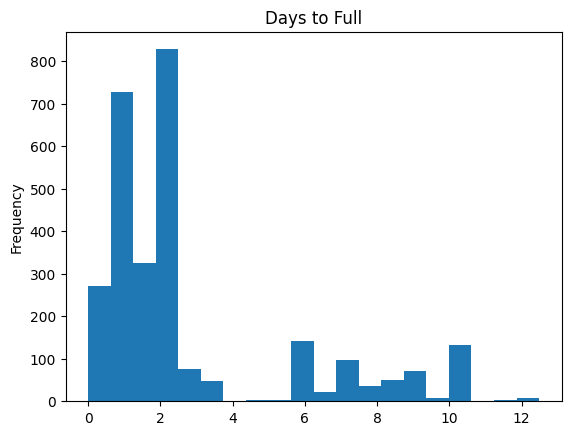

In [232]:
# How much time until full?
# Calculate time between time_to_full and first current_time
time_to_full['duration_to_full'] = time_to_full['time_to_full'] - inscriptions['current_time'].min()
time_to_full['duration_to_full'].describe()
# Histogram of minutes to full
time_to_full['duration_to_full'].dt.total_seconds().div(3600*24).plot(kind='hist', bins=20, title='Days to Full')

<Axes: title={'center': 'Average Time to Full by Day of the Week'}>

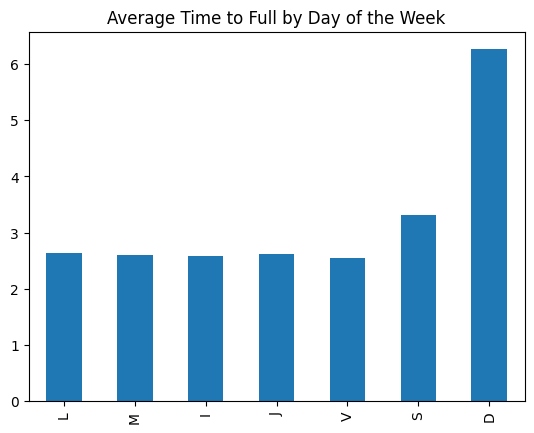

In [234]:
# Does time to full depend on the day of the week?
# Merge with courses['days_of_the_week'] (explode)
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')


# Calculate the average time to full for each day of the week
avg_time_to_full = {}
for day in ['L', 'M', 'I', 'J', 'V', 'S', 'D']:
    # Filter wich nrcs have the day
    nrcs = time_to_full_with_courses[time_to_full_with_courses['days_of_the_week'].apply(lambda days: day in days)]
    # Calculate the average time to full for those nrcs
    avg_time = nrcs['duration_to_full'].dt.total_seconds().div(3600*24).mean()
    # Save the result
    avg_time_to_full[day] = avg_time

# Create a bar plot
pd.Series(avg_time_to_full).plot(kind='bar', title='Average Time to Full by Day of the Week')

<Axes: title={'center': 'Average Time to Full (days) by Time of the Day'}>

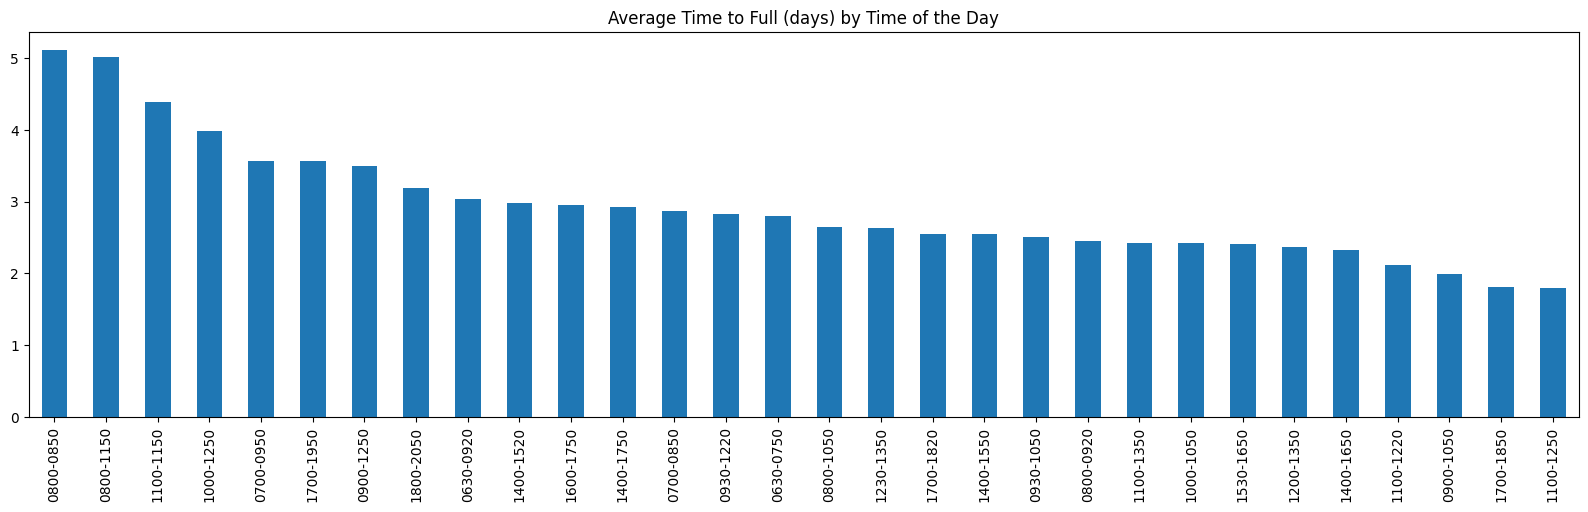

In [241]:
# Does time to full depend on the time of the day?
# Merge with courses['times_of_the_day'] (explode)
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')

# Calculate the average time to full for each time of the day
avg_time_to_full = {}
for time in time_to_full_with_courses['times_of_the_day'].explode().value_counts()[:30].index:
    # Filter which nrcs have the time of the day
    nrcs = time_to_full_with_courses[time_to_full_with_courses['times_of_the_day'].apply(lambda times: time in times)]
    # Calculate the average time to full for those nrcs
    avg_time = nrcs['duration_to_full'].dt.total_seconds().div(3600*24).mean()
    # Save the result
    avg_time_to_full[time] = avg_time

# Create a bar plot
plt.figure(figsize=(20, 5))
pd.Series(avg_time_to_full).sort_values(ascending=False).plot(kind='bar', title='Average Time to Full (days) by Time of the Day')


<Axes: title={'center': 'Average Time to Full (days) by Class'}, xlabel='class'>

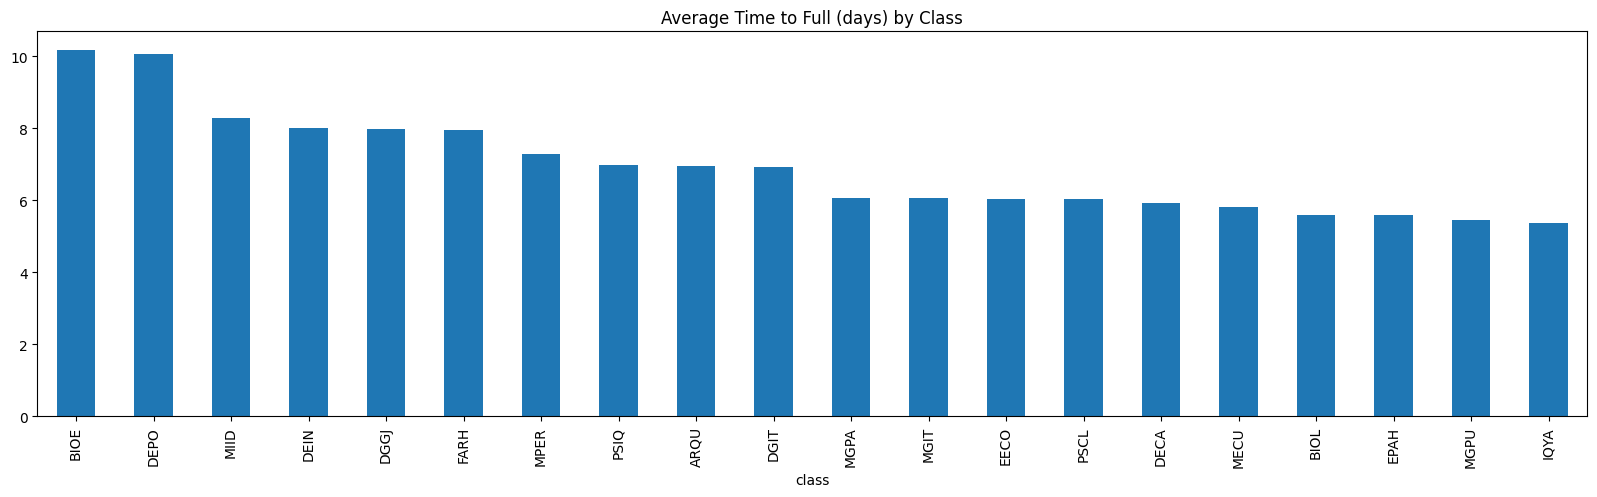

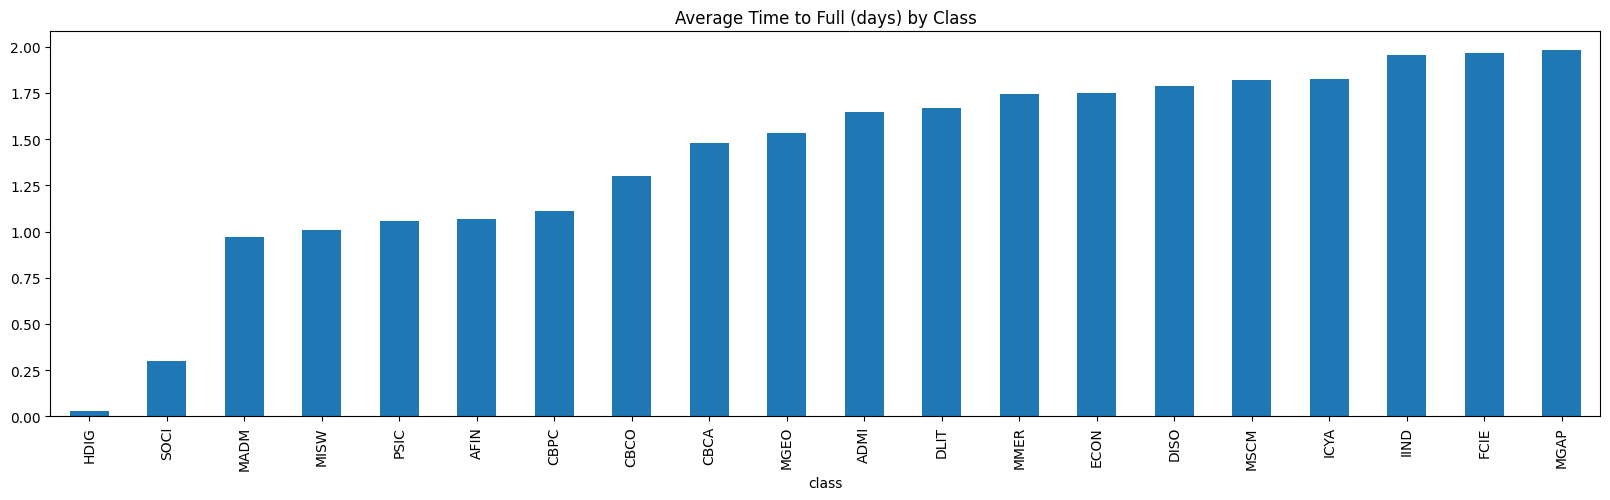

In [249]:
# Do some courses fill up faster than others? (by 'Class'/department)

# Merge with courses['class']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses['duration_to_full_seconds'] = time_to_full_with_courses['duration_to_full'].dt.total_seconds().div(3600*24)
plt.figure(figsize=(20, 5))
time_to_full_with_courses.groupby('class')['duration_to_full_seconds'].mean().sort_values(ascending=False)[:20].plot(kind='bar', title='Average Time to Full (days) by Class')
plt.figure(figsize=(20, 5))
time_to_full_with_courses.groupby('class')['duration_to_full_seconds'].mean().sort_values(ascending=True)[:20].plot(kind='bar', title='Average Time to Full (days) by Class')

<Axes: title={'center': 'Average Time to Full (days) by Course in IIND'}, xlabel='course'>

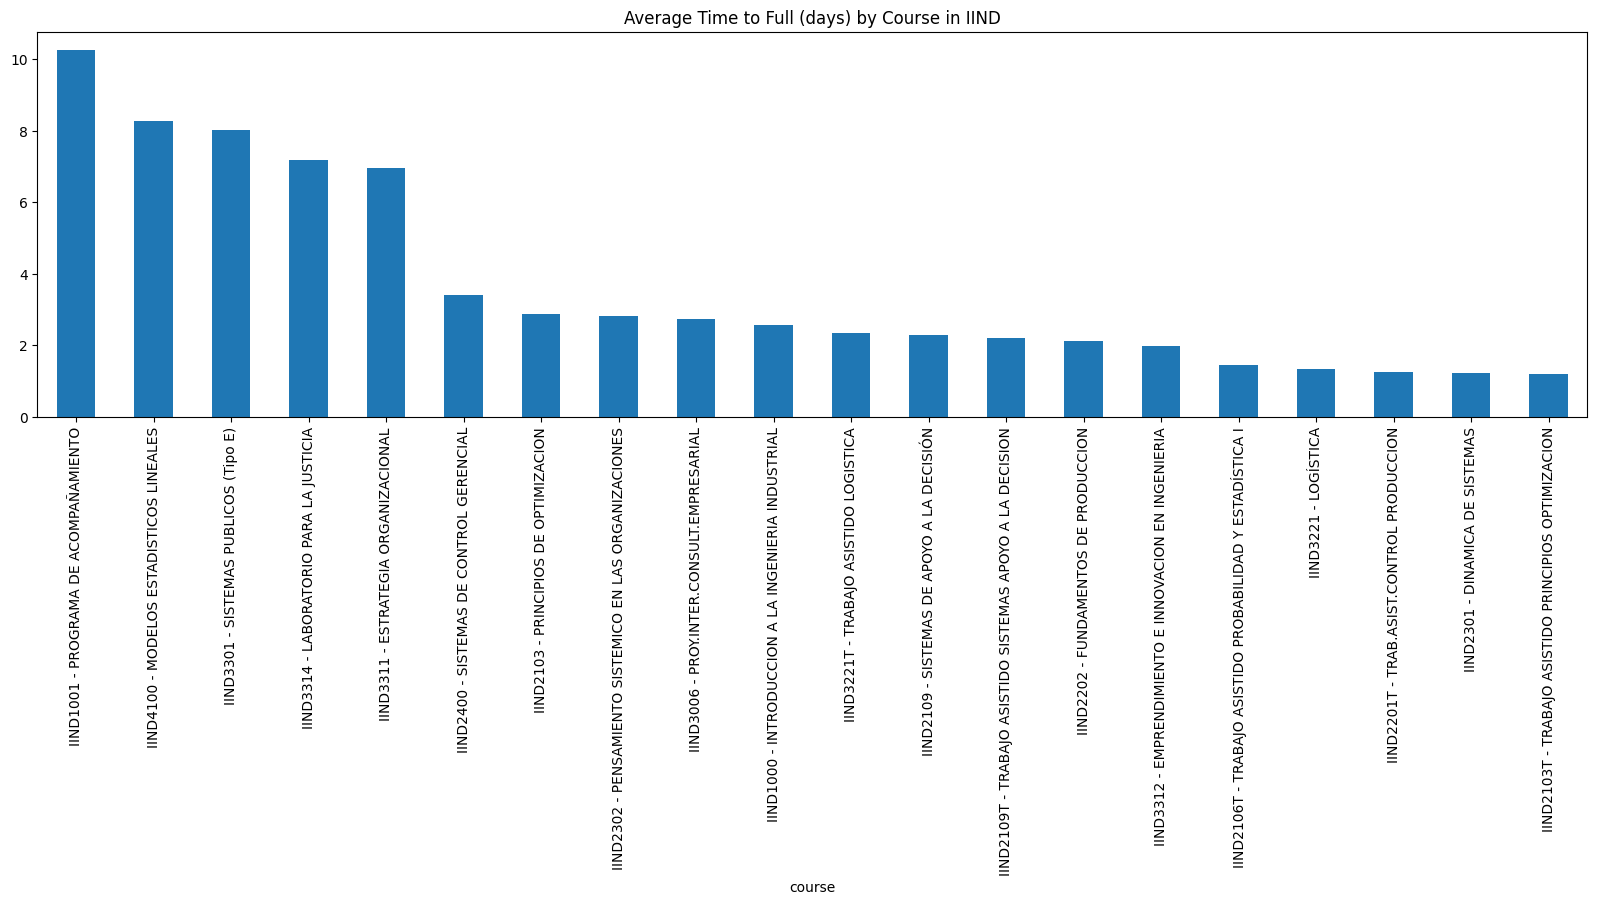

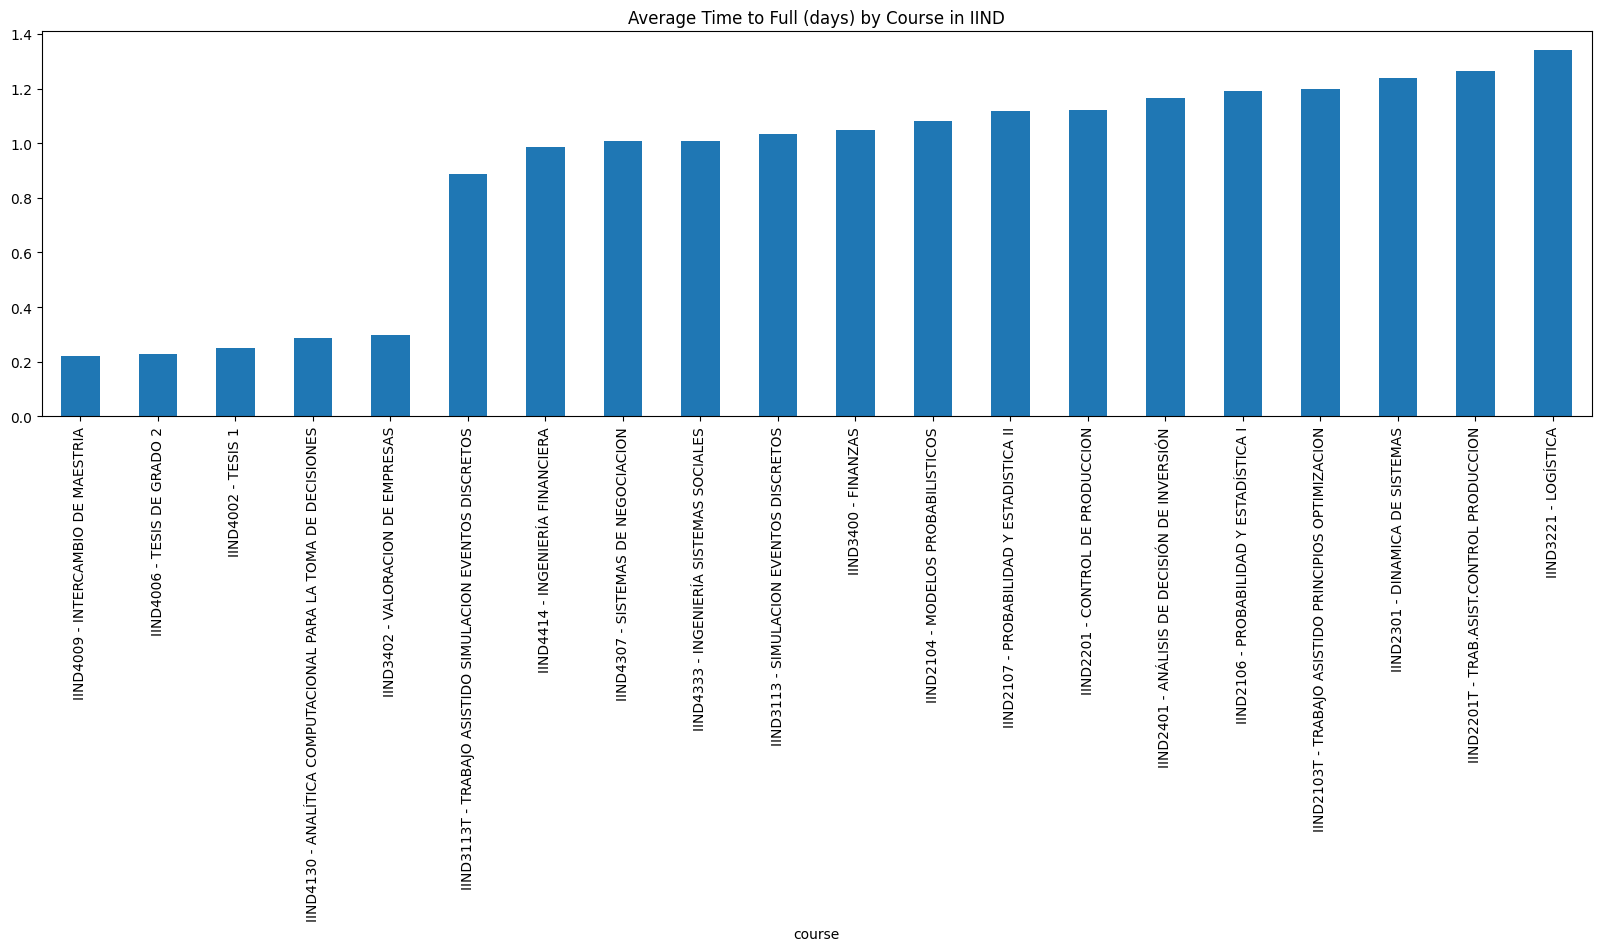

In [257]:
# # Do some courses fill up faster than others?
# What about inside "IIND"? By "course"

# Merge with courses['course']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses = time_to_full_with_courses[time_to_full_with_courses['class'] == 'IIND']
time_to_full_with_courses['duration_to_full_seconds'] = time_to_full_with_courses['duration_to_full'].dt.total_seconds().div(3600*24)
plt.figure(figsize=(20, 5))
iind_class_series = time_to_full_with_courses.groupby('course')['duration_to_full_seconds'].mean().sort_values(ascending=False)[:20]
iind_class_series.index = iind_class_series.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')
iind_class_series.plot(kind='bar', title='Average Time to Full (days) by Course in IIND')
plt.figure(figsize=(20, 5))
iind_class_series = time_to_full_with_courses.groupby('course')['duration_to_full_seconds'].mean().sort_values(ascending=True)[:20]
iind_class_series.index = iind_class_series.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')
iind_class_series.plot(kind='bar', title='Average Time to Full (days) by Course in IIND')

**Spike**
> Are there courses with repeated nrcs?

In [255]:
# Get courses with repeated nrcs
nrc_counts = courses['nrc'].value_counts()
repeated_nrcs = nrc_counts[nrc_counts > 1].index
repeated_courses = courses[courses['nrc'].isin(repeated_nrcs)]
print(len(repeated_courses))
repeated_courses

30


,llave,nrc,class,course,section,credits,title,maxenrol,enrolled,term,ptrm,ptrmdesc,seatsavail,campus,projenrl,schedules,instructors,attr,times_of_the_day,days_of_the_week
200,10004202411,10004,AFIN,5019,1,2,CASOS ANALISIS DE DECISIONES FINANCIERAS,40,30,202411,1,PERIODO COMPLETO,10,CAMPUS PRINCIPAL,40,"[{'time_ini': '1800', 'time_fin': '2050', 'cla...","[{'name': 'ORDOÑEZ CASTRO JAVIER ', 'ind': 'Y'}]",[],{1800-2050},{I}
201,10059202411,10059,AFIN,5030,1,2,FINANZAS PERSONALES,60,18,202411,1,PERIODO COMPLETO,42,CAMPUS PRINCIPAL,0,"[{'time_ini': '1800', 'time_fin': '2050', 'cla...",[],[],{1800-2050},{L}
1239,10027202410,10027,CPOL,1300,1,3,INTRODUCCION A LA POLITICA COLOMBIANA,85,2,202410,1,PERIODO COMPLETO,83,CAMPUS PRINCIPAL,0,"[{'time_ini': '1230', 'time_fin': '1350', 'cla...","[{'name': 'WILLS OTERO LAURA ', 'ind': 'Y'}]",[],{1230-1350},"{V, I}"
1241,10028202410,10028,CPOL,1500,1,3,FUNDAMENTOS DE METODOLOGIA,50,3,202410,1,PERIODO COMPLETO,47,CAMPUS PRINCIPAL,0,"[{'time_ini': '0930', 'time_fin': '1050', 'cla...","[{'name': 'GARCIA SANCHEZ MIGUEL ', 'ind': 'Y'}]",[],{0930-1050},"{I, L}"
1534,10060202411,10060,DEPO,4891,2,1,SELECCIÓN DEPORTIVA- MAESTRÍAS,0,0,202411,1,PERIODO COMPLETO,0,CAMPUS PRINCIPAL,0,"[{'time_ini': None, 'time_fin': None, 'classro...","[{'name': 'SIMBAQUEVA ORJUELA MARIA GILMA', 'i...",[],{},{}
1547,10030202410,10030,DERE,1102,1,3,LOGICA Y RETORICA (Tipo E),15,8,202410,1,PERIODO COMPLETO,7,CAMPUS PRINCIPAL,0,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...","[{'name': 'VARGAS RODRIGUEZ MARIA JOSE', 'ind'...",[{'code': 'ECUR'}],{0800-0920},"{V, M}"
1568,10060202410,10060,DERE,1300,1,3,CONSTITUCIÓN Y DEMOCRACIA,60,35,202410,1,PERIODO COMPLETO,25,CAMPUS PRINCIPAL,0,"[{'time_ini': '0630', 'time_fin': '0750', 'cla...","[{'name': 'GIRALDO BUSTAMANTE CARLOS JULIO', '...",[],{0630-0750},"{J, L}"
1593,10042202410,10042,DERE,2101,2,3,HISTORIA DE LAS INSTITUCIONES,35,2,202410,1,PERIODO COMPLETO,33,CAMPUS PRINCIPAL,0,"[{'time_ini': '0930', 'time_fin': '1050', 'cla...","[{'name': 'MALAGON PINZON MIGUEL ALEJANDRO', '...",[],{0930-1050},"{J, M}"
1642,10050202410,10050,DERE,2208,1,4,RELACIONES FAMILIARES,30,0,202410,1,PERIODO COMPLETO,30,CAMPUS PRINCIPAL,0,"[{'time_ini': '1400', 'time_fin': '1550', 'cla...","[{'name': 'ZABALA OSPINA LILIA ', 'ind': 'Y'}]",[],{1400-1550},"{J, L}"
1663,10043202410,10043,DERE,2304,1,3,LEGISLACION Y POLITICAS PUBLICAS,35,0,202410,1,PERIODO COMPLETO,35,CAMPUS PRINCIPAL,0,"[{'time_ini': '1230', 'time_fin': '1350', 'cla...","[{'name': 'CRUZ GUTIERREZ DAVID FERNANDO', 'in...",[],{1230-1350},"{J, M}"


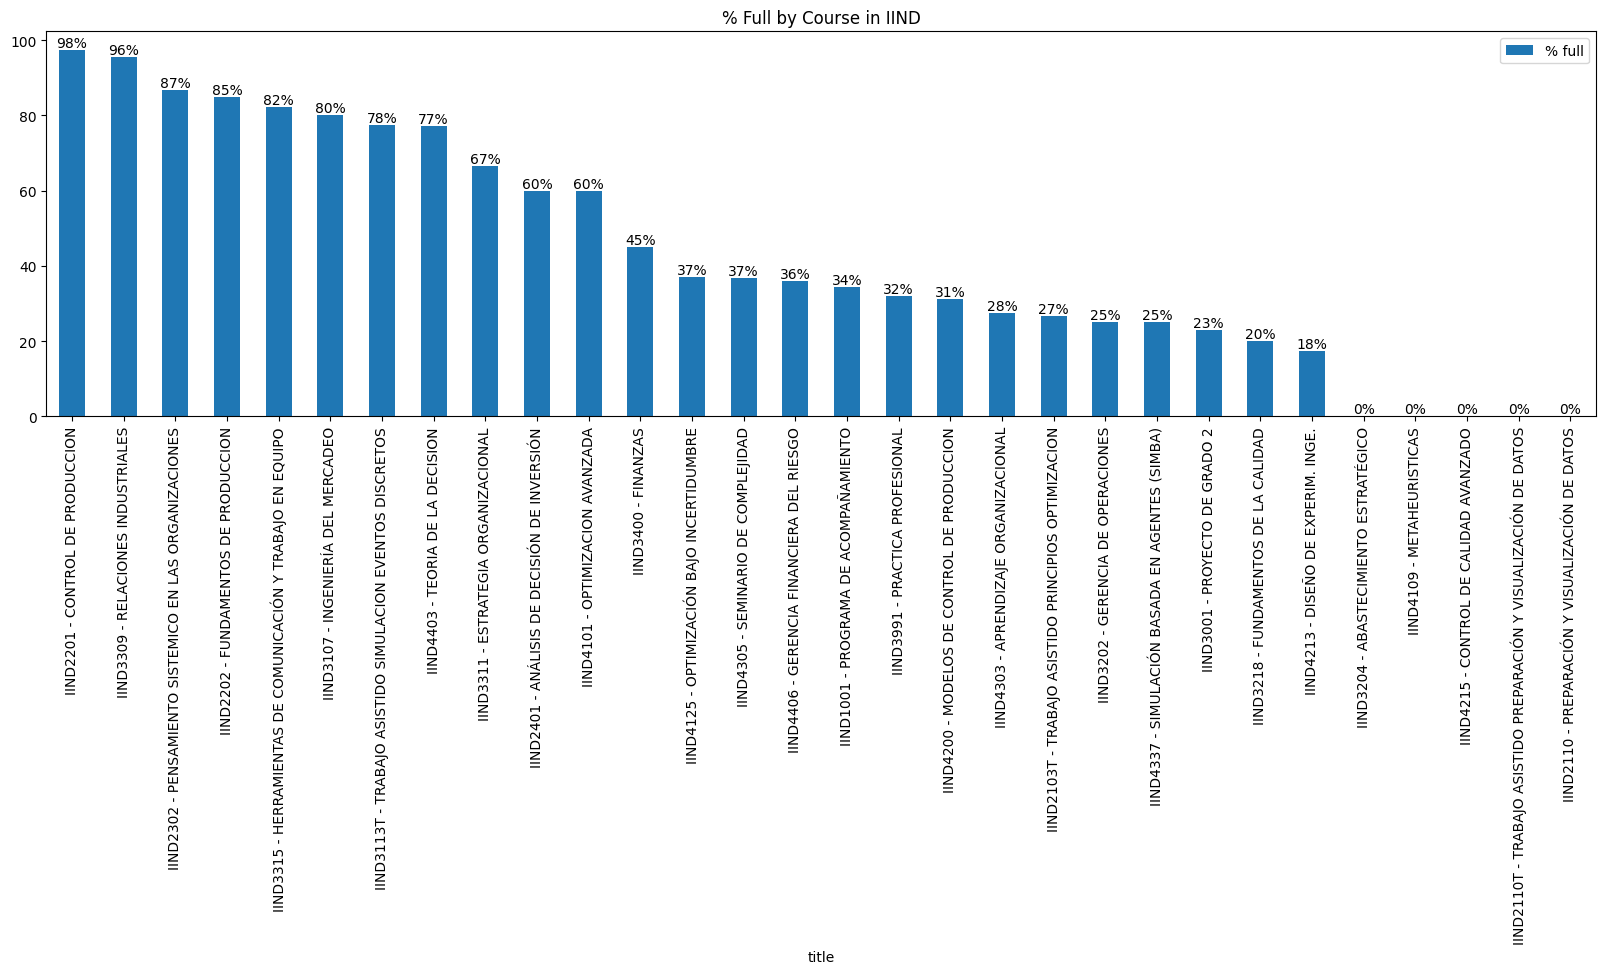

In [287]:
# Which courses in IIND did not reach full capacity? How far were they?
# Merge with courses['class']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses = time_to_full_with_courses[time_to_full_with_courses['class'] == 'IIND'][['duration_to_full', 'nrc', 'maxenrol', 'course']]

# Filter the rows where duration_to_full is NaT
incomplete_courses = time_to_full_with_courses[time_to_full_with_courses['duration_to_full'].isna()].copy()

# Get number of inscriptions for each nrc
incomplete_courses['final_enrolled'] = incomplete_courses['nrc'].apply(lambda nrc: sum(inscriptions[inscriptions['nrc'] == nrc].delta_enrolled) + courses[courses['nrc'] == nrc]['enrolled'].values[0])
incomplete_courses['% full'] = incomplete_courses['final_enrolled'] / incomplete_courses['maxenrol'] * 100
incomplete_courses = incomplete_courses.groupby('course').agg({'% full': 'mean'})
incomplete_courses['title'] = incomplete_courses.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')

# Create a bar plot
plt.figure(figsize=(20, 5))
incomplete_courses.sort_values('% full', ascending=False).plot(x='title', y='% full', kind='bar', title='% Full by Course in IIND', ax=plt.gca())

# Add the exact percentage to each bar
for i, v in enumerate(incomplete_courses.sort_values('% full', ascending=False)['% full']):
    plt.text(i, v, f'{v:.0f}%', ha='center', va='bottom')